In [13]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [14]:
import numpy as np
import glob
import os,sys
# Import Python Libraries
import iris
import iris.plot as iplt
from iris.analysis import MEAN, MAX, SUM, COUNT
import copy
from collections import  OrderedDict

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)

acpc_workspace='/group_workspaces/jasmin2/acpc'
sys.path.append('/home/users/pmarinescu/acpc_intercomparison_3')
sys.path.append('/home/users/pmarinescu')
from acpc_intercomparison import load_variable_cube,color,variable_names,directory,filename
#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename
from collections import  OrderedDict

In [15]:
# COSMO_KIT  MesoNH_Toulouse  RAMS_CSU  UM_LEEDS  WRF_NASA  WRF_OXF  WRF_PNNL
models = []
models.append('COSMO_KIT')
models.append('MesoNH_Toulouse')
models.append('RAMS_CSU')
models.append('UM_LEEDS')
models.append('WRF_NASA')
models.append('WRF_OXF')
models.append('WRF_PNNL')

mn = OrderedDict()
mn['COSMO_KIT'] = ['COSMO']
mn['MesoNH_Toulouse'] = ['MesoNH']
mn['RAMS_CSU'] = ['RAMS']
mn['UM_LEEDS'] = ['UM']
mn['WRF_NASA'] = ['NU-WRF']
mn['WRF_OXF'] = ['WRF-Morr']
mn['WRF_PNNL'] = ['WRF-SBM']

dx = '500m'
dt = '5m'


In [21]:
w_mid_c = OrderedDict()
alt_c = OrderedDict()
t_avg_c = OrderedDict()
w_cnt_c = OrderedDict()
w_avg_c = OrderedDict()
w_med_c = OrderedDict()
w_75_c = OrderedDict()
w_90_c = OrderedDict()

w_mid_p = OrderedDict()
alt_p = OrderedDict()
t_avg_p = OrderedDict()
w_cnt_p = OrderedDict()
w_avg_p = OrderedDict()
w_med_p = OrderedDict()
w_75_p = OrderedDict()
w_90_p = OrderedDict()

w_cnt_p_n = OrderedDict()
w_cnt_c_n = OrderedDict()

import pickle
thresh = 0.0001

plot_dir = '/group_workspaces/jasmin2/acpc/public/pmarin/Manuscript/CFADS'
os.makedirs(plot_dir,exist_ok=True)

term_filename = 'Term_TH_v2'
for model in models:
    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
    [w_mid_p[model],alt_p[model],t_avg_p[model],w_cnt_p[model],w_avg_p[model],w_med_p[model],w_75_p[model]] = pickle.load(open(os.path.join(savedir,'CFAD_'+term_filename+'_'+str(thresh)+'_Apr196km.p'),"rb"))

    savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
    [w_mid_c[model],alt_c[model],t_avg_c[model],w_cnt_c[model],w_avg_c[model],w_med_c[model],w_75_c[model]] = pickle.load(open(os.path.join(savedir,'CFAD_'+term_filename+'_'+str(thresh)+'_Apr196km.p'),"rb"))

In [22]:
print(model)

WRF_PNNL


In [23]:
pn = OrderedDict()
pn['COSMO_KIT'] = ['(a)','(h)','(o)']
pn['MesoNH_Toulouse'] = ['(b)','(i)','(p)']
pn['RAMS_CSU'] = ['(c)','(j)','(q)']
pn['UM_LEEDS'] = ['(d)','(k)','(r)']
pn['WRF_NASA'] = ['(e)','(l)','(s)']
pn['WRF_OXF'] = ['(f)','(m)','(t)']
pn['WRF_PNNL'] = ['(g)','(n)','(u)']

In [24]:
import pickle
z_filename = '/group_workspaces/jasmin2/acpc/users/pmarin/Z_temp_levels.p'
z_0C,z_38C = pickle.load(open(z_filename,'rb'))

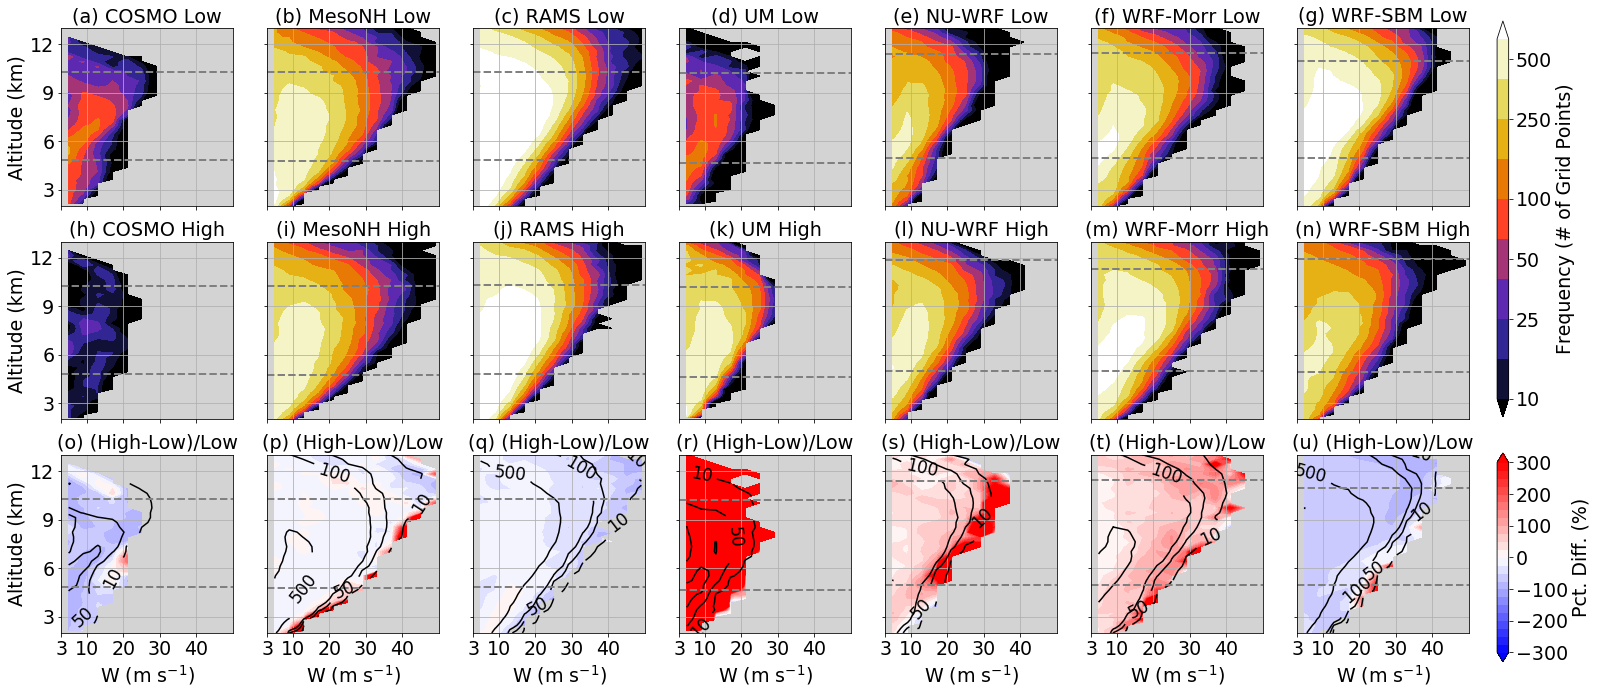

In [36]:

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

c_lvls = np.arange(0,2000,50)
c_lvls = [0,10,50,100,250,500,1000]

c_lvls = np.arange(1,4,0.2)
c_lvls = np.arange(1,3,0.2)


c2_lvls = np.arange(-300,301,25)
tick_levels2 = np.arange(-300,301,100)
#c2_lvls = np.arange(0.1,3,0.2)

c3_lvls = [10,50,100,500]

tick_labels = [10,25,50,100,250,500,1000]
tick_levels = np.log10(tick_labels)

hline_color = 'gray'
hline_size = 2

fs2 = 19
fsc = 17

ylims = [2,13]
xlims = [3,50]
xticks = [3,10,20,30,40]
yticks = [3,6,9,12]
bgc = "lightgray"
plt.rcParams.update({'font.size': 16})
fig,ax = plt.subplots(3,7,figsize=(23,10))
cntm = 0
for model in models:

    # CLEAN Simulation Plot
    a = ax[0,cntm].contourf(w_mid_c[model],alt_c[model]/1000,np.transpose(np.log10(w_cnt_c[model])),levels=c_lvls,extend='both',cmap=plt.cm.CMRmap)
#    if cntm == 6:
#        plt.colorbar(a,ax=ax[0,cntm])
    if cntm == 6:
        fig.subplots_adjust(right=0.9)
        cbar_ax = fig.add_axes([0.917, 0.38, 0.007, 0.55])
        cbar1 = fig.colorbar(a, cax=cbar_ax)
        cbar1.set_ticks(tick_levels)
        cbar1.set_ticklabels(tick_labels)
        cbar1.ax.tick_params(labelsize=fs2) 
        cbar1.ax.set_ylabel('Frequency (# of Grid Points)',fontsize=fs2)

    ax[0,cntm].plot([3,50],[z_0C[model,'CLN']/1000,z_0C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
    ax[0,cntm].plot([3,50],[z_38C[model,'CLN']/1000,z_38C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
    ax[0,cntm].set_ylim(ylims)
    ax[0,cntm].set_xlim(xlims)
    ax[0,cntm].set_title(pn[model][0]+' '+mn[model][0]+' Low')
    ax[0,cntm].set_yticks(yticks)
    ax[0,cntm].set_xticks(xticks)
    ax[0,cntm].set_facecolor(bgc)

    ax[0,cntm].grid()
    ax[0,cntm].set_xticklabels('')

    # POL Simulation Plot
    a = ax[1,cntm].contourf(w_mid_p[model],alt_p[model]/1000,np.transpose(np.log10(w_cnt_p[model])),levels=c_lvls,extend='both',cmap=plt.cm.CMRmap)
#    if cntm == 6:
#        plt.colorbar(a,ax=ax[1,cntm])
    ax[1,cntm].plot([3,50],[z_0C[model,'POL']/1000,z_0C[model,'POL']/1000],'--',color=hline_color,lw=hline_size)     
    ax[1,cntm].plot([3,50],[z_38C[model,'POL']/1000,z_38C[model,'POL']/1000],'--',color=hline_color,lw=hline_size)     
    ax[1,cntm].set_ylim(ylims)
    ax[1,cntm].set_xlim(xlims)
    ax[1,cntm].set_yticks(yticks)
    ax[1,cntm].set_xticks(xticks)
    ax[1,cntm].grid()
    ax[1,cntm].set_title(pn[model][1]+' '+mn[model][0]+' High')
    ax[1,cntm].set_xticklabels('')
    ax[1,cntm].set_facecolor(bgc)

    plt_data = w_cnt_p[model] - w_cnt_c[model]
    plt_data = (w_cnt_p[model] - w_cnt_c[model])/w_cnt_c[model]*100

    
    import numpy.ma as ma
#    plt_data = ma.masked_where(w_cnt_p[model] < 1, plt_data)
#    plt_data = ma.masked_where(w_cnt_c[model] < 1, plt_data)
    #plt_data = np.log10(plt_data)
    
    # Difference Simulation Plot
    a = ax[2,cntm].contourf(w_mid_p[model],alt_p[model]/1000,np.transpose(plt_data),levels=c2_lvls,extend='both',cmap=plt.cm.bwr)
    
#    if cntm == 6:
#        plt.colorbar(a,ax=ax[2,cntm])    
    if cntm == 6:
        fig.subplots_adjust(right=0.9)
        cbar_ax = fig.add_axes([0.917, 0.04, 0.007, 0.29])
        cbar2 = fig.colorbar(a, cax=cbar_ax)            
        cbar2.set_ticks(tick_levels2)                        
        cbar2.ax.tick_params(labelsize=fs2) 
        cbar2.ax.set_ylabel('Pct. Diff. (%)',fontsize=fs2)
    
    ax[2,cntm].set_facecolor(bgc)
    b = ax[2,cntm].contour(w_mid_c[model],alt_c[model]/1000,np.transpose(w_cnt_c[model]),colors='k',levels=c3_lvls)
    ax[2,cntm].clabel(b,fmt='%1.0f',fontsize=fsc)    
    ax[2,cntm].plot([3,50],[z_0C[model,'CLN']/1000,z_0C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
    ax[2,cntm].plot([3,50],[z_38C[model,'CLN']/1000,z_38C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
        
    ax[2,cntm].set_xlim(xlims)
    ax[2,cntm].set_ylim(ylims)
    ax[2,cntm].set_xlabel('W (m s$^{-1}$)',fontsize=fs2)
    ax[2,cntm].grid()
    ax[2,cntm].set_yticks(yticks)
    ax[2,cntm].set_xticks(xticks)
    ax[2,cntm].set_title(pn[model][2]+' '+'(High-Low)/Low')

    if cntm == 0:
        for yy in np.arange(0,3):
            ax[yy,cntm].set_ylabel('Altitude (km)',fontsize=fs2)
    else:
        for yy in np.arange(0,3):
            ax[yy,cntm].set_yticklabels('')

    cntm = cntm + 1

for ii in np.arange(0,3):
    for jj in np.arange(0,7):
        for tick in ax[ii,jj].xaxis.get_major_ticks():
            tick.label.set_fontsize(fs2) 
        for tick in ax[ii,jj].yaxis.get_major_ticks():
            tick.label.set_fontsize(fs2) 
fig.subplots_adjust(left=0.05,bottom=0.08,top=0.92)                
            

#plt.tight_layout()
plt.savefig(plot_dir+'CFADs_'+term_filename+'_'+str(thresh)+'_PDIF_wcntr_Apr196km.png')
plt.savefig(plot_dir+'CFADs_'+term_filename+'_'+str(thresh)+'_PDIF_wcntr_Apr196km.pdf')


In [31]:
print(np.shape(plt_data))
print(plt_data[12,:])

(12, 92)


IndexError: index 12 is out of bounds for axis 0 with size 12

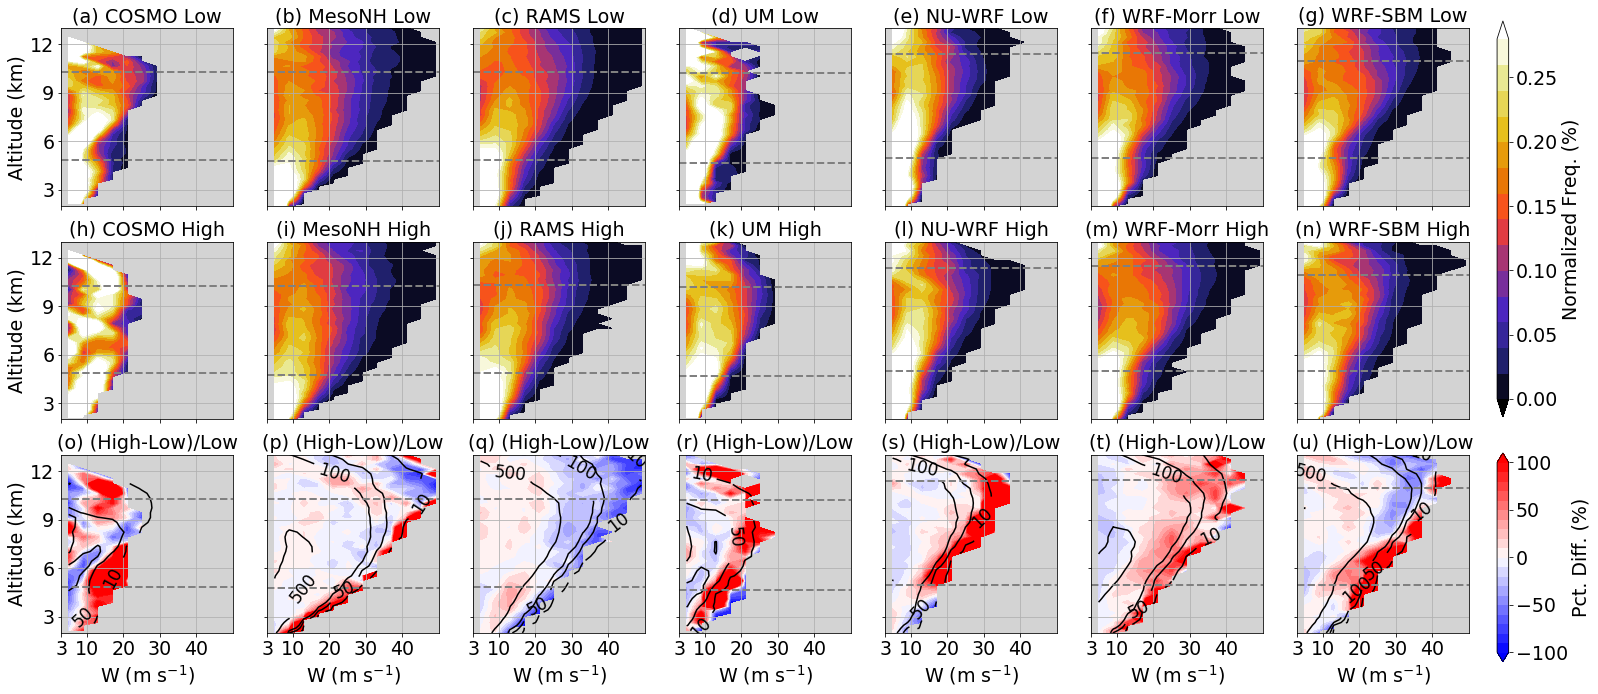

In [37]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

c_lvls = np.arange(0,0.3,0.02)
#c_lvls = [0,10,50,100,250,500,1000]
#c_lvls = np.arange(1,4,0.2)
#c_lvls = np.arange(1,3,0.2)

c2_lvls = np.arange(-100,101,10)
tick_levels2 = np.arange(-100,101,50); #c2_lvls = np.arange(0.1,3,0.2)

c3_lvls = [10,50,100,500]

hline_color = 'gray'
hline_size = 2

fs2 = 19
fsc = 17

tick_levels = np.arange(0,0.41,0.05); 
ylims = [2,13]
xticks = [3,10,20,30,40]
yticks = [3,6,9,12]
fig,ax = plt.subplots(3,7,figsize=(23,10))
cntm = 0
plt.rcParams.update({'font.size': 16})



for model in models:

    w_cnt_p_n[model] = w_cnt_p[model]/np.nansum(w_cnt_p[model],axis=0)
    w_cnt_c_n[model] = w_cnt_c[model]/np.nansum(w_cnt_c[model],axis=0)
    
    # CLEAN Simulation Plot
    a = ax[0,cntm].contourf(w_mid_c[model],alt_c[model]/1000,np.transpose(w_cnt_c_n[model]),levels=c_lvls,extend='both',cmap=plt.cm.CMRmap)

#    if cntm == 6:
#        plt.colorbar(a,ax=ax[0,cntm])        
    if cntm == 6:
        fig.subplots_adjust(right=0.9)
        cbar_ax = fig.add_axes([0.917, 0.38, 0.007, 0.55])
        cbar1 = fig.colorbar(a, cax=cbar_ax)
        cbar1.set_ticks(tick_levels)
        cbar1.ax.tick_params(labelsize=fs2) 
        cbar1.ax.set_ylabel('Normalized Freq. (%)',fontsize=fs2)    

    ax[0,cntm].set_facecolor(bgc)
    ax[0,cntm].plot([3,50],[z_0C[model,'CLN']/1000,z_0C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
    ax[0,cntm].plot([3,50],[z_38C[model,'CLN']/1000,z_38C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
    ax[0,cntm].set_ylim(ylims)
    ax[0,cntm].set_xlim(xlims)
    ax[0,cntm].set_title(pn[model][0]+' '+mn[model][0]+' Low')
    ax[0,cntm].set_yticks(yticks)
    ax[0,cntm].set_xticks(xticks)
    ax[0,cntm].grid()
    ax[0,cntm].set_xticklabels('')

    # POL Simulation Plot
    ax[1,cntm].set_facecolor(bgc)
    a = ax[1,cntm].contourf(w_mid_p[model],alt_p[model]/1000,np.transpose(w_cnt_p_n[model]),levels=c_lvls,extend='both',cmap=plt.cm.CMRmap)
#    if cntm == 6:
#        plt.colorbar(a,ax=ax[1,cntm])
    ax[1,cntm].plot([3,50],[z_0C[model,'CLN']/1000,z_0C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
    ax[1,cntm].plot([3,50],[z_38C[model,'CLN']/1000,z_38C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
    ax[1,cntm].set_xlim(xlims)
    ax[1,cntm].set_ylim(ylims)
    ax[1,cntm].set_yticks(yticks)
    ax[1,cntm].set_xticks(xticks)
    ax[1,cntm].grid()
    ax[1,cntm].set_title(pn[model][1]+' '+mn[model][0]+' High')
    ax[1,cntm].set_xticklabels('')

#    plt_data = w_cnt_p[model] - w_cnt_c[model]
    plt_data = (w_cnt_p_n[model] - w_cnt_c_n[model])/w_cnt_c_n[model]*100

    
    import numpy.ma as ma
    plt_data = ma.masked_where(w_cnt_p[model] < 1, plt_data)
    plt_data = ma.masked_where(w_cnt_c[model] < 1, plt_data)
    #plt_data = np.log10(plt_data)
    
    # Difference Simulation Plot
    a = ax[2,cntm].contourf(w_mid_p[model],alt_p[model]/1000,np.transpose(plt_data),levels=c2_lvls,extend='both',cmap=plt.cm.bwr)
    
    if cntm == 6:
        fig.subplots_adjust(right=0.9)
        cbar_ax = fig.add_axes([0.917, 0.04, 0.007, 0.29])
        cbar2 = fig.colorbar(a, cax=cbar_ax)            
        cbar2.set_ticks(tick_levels2)                        
        cbar2.ax.tick_params(labelsize=fs2) 
        cbar2.ax.set_ylabel('Pct. Diff. (%)',fontsize=fs2)                          

    ax[2,cntm].set_facecolor(bgc)
    b = ax[2,cntm].contour(w_mid_p[model],alt_p[model]/1000,np.transpose(w_cnt_c[model]),colors='k',levels=c3_lvls)
    ax[2,cntm].clabel(b,fmt='%1.0f',fontsize=fsc)    

    ax[2,cntm].plot([3,50],[z_0C[model,'CLN']/1000,z_0C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
    ax[2,cntm].plot([3,50],[z_38C[model,'CLN']/1000,z_38C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
    
    ax[2,cntm].set_ylim(ylims)
    ax[2,cntm].set_xlim(xlims)
    ax[2,cntm].set_yticks(yticks)
    ax[2,cntm].set_xticks(xticks)
    ax[2,cntm].set_xlabel('W (m s$^{-1}$)',fontsize=fs2)  
    ax[2,cntm].grid()
    ax[2,cntm].set_title(pn[model][2]+' '+'(High-Low)/Low')

    if cntm == 0:
        for yy in np.arange(0,3):
            ax[yy,cntm].set_ylabel('Altitude (km)',fontsize=fs2)
    else:
        for yy in np.arange(0,3):
            ax[yy,cntm].set_yticklabels('')

    cntm = cntm + 1

for ii in np.arange(0,3):
    for jj in np.arange(0,7):
        for tick in ax[ii,jj].xaxis.get_major_ticks():
            tick.label.set_fontsize(fs2) 
        for tick in ax[ii,jj].yaxis.get_major_ticks():
            tick.label.set_fontsize(fs2) 
fig.subplots_adjust(left=0.05,bottom=0.08,top=0.92)                
                
#plt.tight_layout()
plt.savefig(plot_dir+'NORM_CFADs_'+term_filename+'_'+str(thresh)+'_PDIF_wcntr_Apr196km.png')
plt.savefig(plot_dir+'NORM_CFADs_'+term_filename+'_'+str(thresh)+'_PDIF_wcntr_Apr196km.pdf')

In [21]:
np.shape(w_cnt_p[model]/np.nansum(w_cnt_p[model],axis=0))


(23, 92)

In [22]:
np.nanmin(w_cnt_p[model])

1.0

In [66]:
import h5py
f = h5py.File('/group_workspaces/jasmin2/acpc/houston_deep_convection/RAMS_CSU/CLN/5min/a-A-2013-06-20-010000-g3.h5', 'r')

In [67]:
print(f)

<HDF5 file "a-A-2013-06-20-010000-g3.h5" (mode r)>


In [71]:
for key in f.keys():
   print(key)

ACCPA
ACCPAERO
ACCPD
ACCPG
ACCPH
ACCPP
ACCPR
ACCPS
AGGREGATE
AGGREGATET
AGGRPRISSNOWT
AGGRSELFPRIST
AGGRSELFSNOWT
ALBEDT
BEXT
CAN_RVAP
CAN_TEMP
CAP
CCCMP
CCCNP
CCP
CDP
CGP
CHP
CLD2RAIN
CLD2RAINT
CNMAP
CNMCP
CNMDP
CNMGP
CNMHP
CNMPP
CNMRP
CNMSP
COSZ
CPP
CRP
CSP
DN0
DPCPG
FTHRD
GCCMP
GCCNP
GLAT
GLON
GROUND_RSAT
GROUND_RVAP
HKH
ICE2RAIN
ICE2RAINT
IFNNUCP
IMMERCP
IMMERDP
IMMERRP
INUCCONTRT
INUCHAZRT
INUCHOMRT
INUCIFNRT
LATHEATFRZ
LATHEATFRZT
LATHEATVAP
LATHEATVAPT
LEAF_CLASS
LWDN
LWUP
MELTAGGRT
MELTGRAUT
MELTHAILT
MELTICE
MELTICET
MELTPRIST
MELTSNOWT
NUCCLDR
NUCCLDRT
NUCICER
NUCICERT
PATCH_AREA
PATCH_ROUGH
PC
PCPG
PCPRA
PCPRAERO
PCPRD
PCPRG
PCPRH
PCPRP
PCPRR
PCPRS
PCPVA
PCPVD
PCPVG
PCPVH
PCPVP
PCPVR
PCPVS
PI
PP
Q2
Q6
Q7
QPCPG
RAIN2AGT
RAIN2GRT
RAIN2HAT
RAIN2ICE
RAIN2ICET
RAIN2PRT
RAIN2SNT
RAP
RCP
RDP
REGEN_AERO1_MP
REGEN_AERO1_NP
REGEN_AERO2_MP
REGEN_AERO2_NP
RGP
RHKM
RHP
RIMECLD
RIMECLDAGGRT
RIMECLDGRAUT
RIMECLDHAILT
RIMECLDSNOWT
RIMECLDT
RLONG
RLONGUP
RPP
RRP
RSHORT
RSP
RSTAR
RTP
RV
RVKH


In [72]:

import netCDF4
import numpy as np
from matplotlib import pyplot as plt

filename = '/group_workspaces/jasmin2/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_01:05:00'
ncfile = netCDF4.Dataset(filename,'r')
print(ncfile.variables)

OrderedDict([('Times', <class 'netCDF4._netCDF4.Variable'>
|S1 Times(Time, DateStrLen)
unlimited dimensions: Time
current shape = (1, 19)
filling off
), ('XLAT', <class 'netCDF4._netCDF4.Variable'>
float32 XLAT(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: LATITUDE, SOUTH IS NEGATIVE
    units: degree_north
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 498, 498)
filling off
), ('XLONG', <class 'netCDF4._netCDF4.Variable'>
float32 XLONG(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: LONGITUDE, WEST IS NEGATIVE
    units: degree_east
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 498, 498)
filling off
), ('LU_INDEX', <class 'netCDF4._netCDF4.Variable'>
float32 LU_INDEX(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: LAND USE CATEGORY
    units: 
    stagger: 
    coordinates: XLONG XLAT